Import all the required packages and libraries

In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score,classification_report
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import tree
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
except:
    print("Unable to import all the modules.You may have an error.")

Reading dataset

In [2]:
try:
    data=pd.read_csv("D:\\Studies\\Bangalore\\Python\\Maternal Health Risk Data Set.csv")
except:
    print("Unable to locate dataset")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Density plot of body temperature

Text(0.5, 1.0, 'Density plot of Body Temperature')

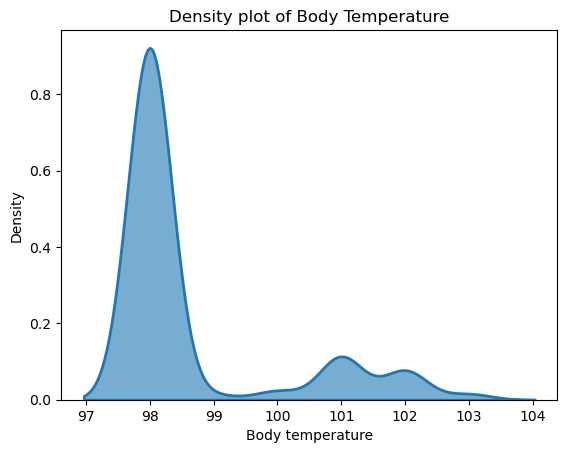

In [3]:
sns.kdeplot(data=data,x="BodyTemp",fill=True,alpha=0.6,linewidth=2)
plt.xlabel("Body temperature")
plt.ylabel("Density")
plt.title("Density plot of Body Temperature")

How much people are having high risk, low risk and mid risk

Text(0.5, 1.0, 'Count plot of Risk level')

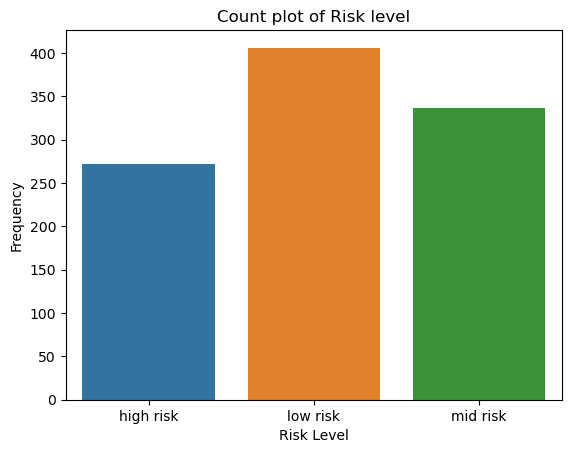

In [4]:
sns.countplot(data,x="RiskLevel")
plt.xlabel("Risk Level")
plt.ylabel("Frequency")
plt.title("Count plot of Risk level")

Relationship between diastolic bp and systolic bp

Text(0.5, 1.0, 'Systolic vs Diastolic Scatterplot')

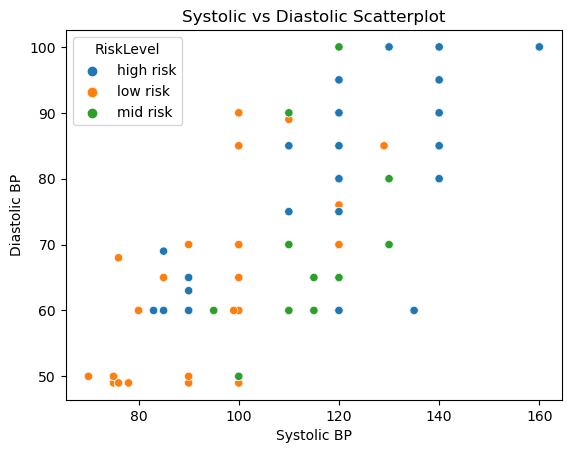

In [5]:
sns.scatterplot(x="SystolicBP",y="DiastolicBP",data=data,hue="RiskLevel")
plt.xlabel("Systolic BP")
plt.ylabel("Diastolic BP")
plt.title("Systolic vs Diastolic Scatterplot")

What is the distribution of ages of the patients

Text(0.5, 1.0, 'Distribution of Age')

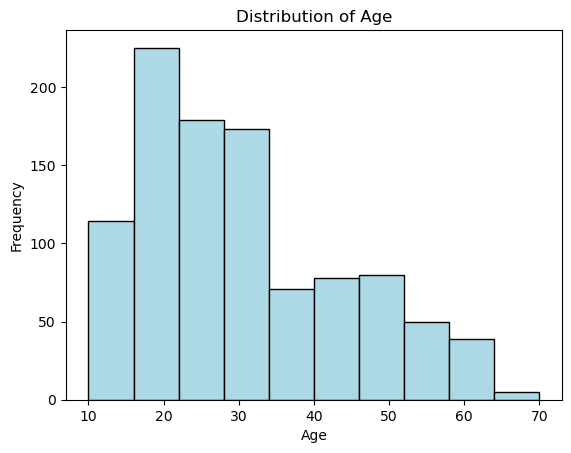

In [6]:
plt.hist(data["Age"],color="lightblue",edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

<Axes: xlabel='Age'>

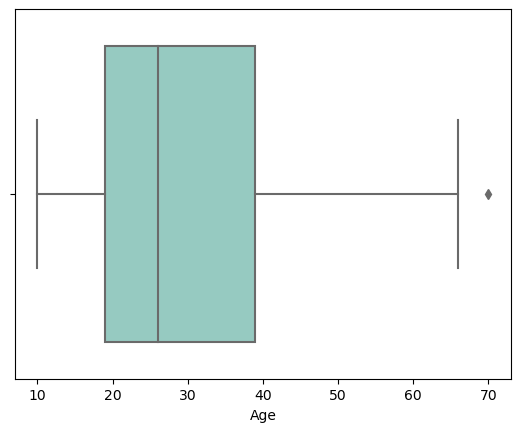

In [7]:
#Is there anomalies in the age group of patients
sns.boxplot(x="Age",data=data,linewidth=1.5,palette="Set3")

Pushing the dataset into SQLite database

In [8]:
import sqlite3
conn=sqlite3.connect(r"C:\Users\91944\test2.db")
data.to_sql("Maternal_Health_Risk",conn,index=True,if_exists='replace')

1014

Heat map of correlation between each column

<Axes: >

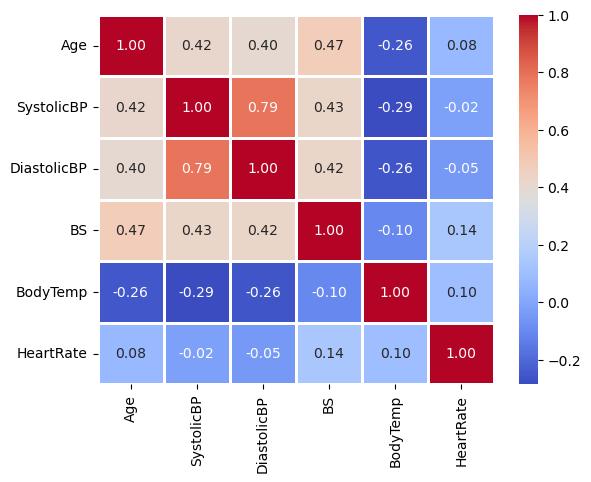

In [9]:
numerical_data=data.drop(columns=["RiskLevel"])
corr_matrix=numerical_data.corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f",linewidth=2,cmap="coolwarm")

Seperate training and testing data

In [10]:
x=data.drop("RiskLevel",axis=1)
y=data["RiskLevel"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)

Building Decision Tree Model

In [11]:
class DecisionTree:
    def __init__(self):
        self.model=DecisionTreeClassifier()
    def train(self,xtrain,ytrain):
        self.model.fit(xtrain,ytrain)
    def predict(self,xtest):
        return self.model.predict(xtest)
    def evaluate(self,xtest,ytest):
        ypred=self.model.predict(xtest)
        return accuracy_score(ytest,ypred)


Decision Tree Model

In [12]:
dtree=DecisionTree()
#Training the model
dtree.train(xtrain,ytrain)
#Predicting the values
dtree.predict(xtest)
#Evaluating with accuracy score
dtree.evaluate(xtest,ytest)

0.8229508196721311

Building Random Forest Model

In [13]:
class RandomForest:
    def __init__(self):
        self.model=RandomForestClassifier()
    def train(self,xtrain,ytrain):
        self.model.fit(xtrain,ytrain)
    def predict(self,xtest):
        return self.model.predict(xtest)
    def evaluate(self,xtest,ytest):
        ypred=self.model.predict(xtest)
        return accuracy_score(ytest,ypred)

Random Forest Model

In [14]:
rfmodel=RandomForest()
#Training the model
rfmodel.train(xtrain,ytrain)
#Predicting the values
rfmodel.predict(xtest)
#Evaluating the model using accuracy score
rfmodel.evaluate(xtest,ytest)


0.8426229508196721

Plotting the confusion matrix for both the models

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Classifier')

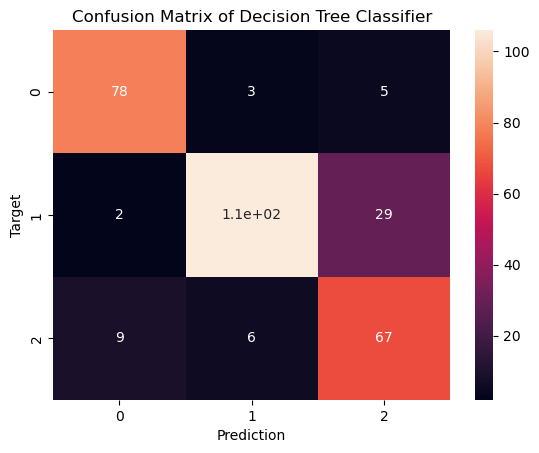

In [29]:
dtreepred=dtree.predict(xtest)
rfpred=rfmodel.predict(xtest)
cf1=confusion_matrix(ytest,dtreepred)
sns.heatmap(cf1,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.title("Confusion Matrix of Decision Tree Classifier")

Text(0.5, 1.0, 'Confusion Matrix of Random Forest classifier')

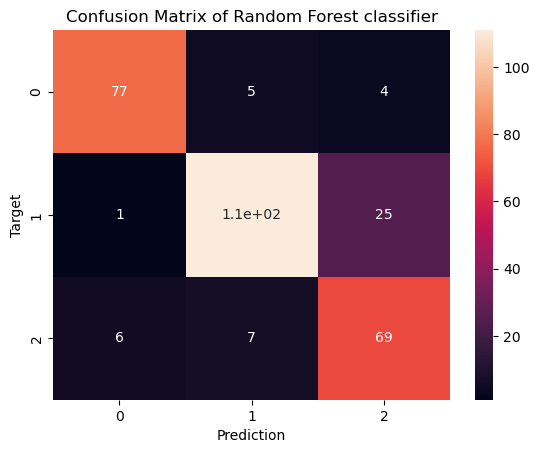

In [17]:
cf2=confusion_matrix(ytest,rfpred)
sns.heatmap(cf2,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.title("Confusion Matrix of Random Forest classifier")

Classification report details and comparisons of both the models

In [18]:
cr_dt=classification_report(ytest,dtreepred)
print(cr_dt)

              precision    recall  f1-score   support

   high risk       0.88      0.91      0.89        86
    low risk       0.92      0.77      0.84       137
    mid risk       0.66      0.82      0.73        82

    accuracy                           0.82       305
   macro avg       0.82      0.83      0.82       305
weighted avg       0.84      0.82      0.83       305



In [19]:
cr_rf=classification_report(ytest,rfpred)
print(cr_rf)

              precision    recall  f1-score   support

   high risk       0.92      0.90      0.91        86
    low risk       0.90      0.81      0.85       137
    mid risk       0.70      0.84      0.77        82

    accuracy                           0.84       305
   macro avg       0.84      0.85      0.84       305
weighted avg       0.85      0.84      0.85       305



Predicted vs Actual values for Both the Models

In [37]:
#Random Forest Model
predvactrf=pd.DataFrame({"Actual":ytest,"predicted":rfpred})
predvactrf

,Actual,predicted
849,mid risk,mid risk
48,low risk,low risk
358,mid risk,mid risk
531,mid risk,low risk
149,high risk,high risk
...,...,...
203,mid risk,mid risk
432,high risk,high risk
685,high risk,high risk
983,high risk,high risk


In [38]:
#Decision Tree Model
predvactdt=pd.DataFrame({"Actual":ytest,"Predicted":dtreepred})
predvactdt

,Actual,Predicted
849,mid risk,mid risk
48,low risk,low risk
358,mid risk,mid risk
531,mid risk,low risk
149,high risk,high risk
...,...,...
203,mid risk,mid risk
432,high risk,high risk
685,high risk,high risk
983,high risk,high risk


In [6]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [14]:
for i in data['Age']:
    if i>20:
        print(data['BS'])
    else:
        continue

0       15.0
1       13.0
2        8.0
3        7.0
4        6.1
        ... 
1009    15.0
1010    18.0
1011    19.0
1012    18.0
1013     6.0
Name: BS, Length: 1014, dtype: float64
0       15.0
1       13.0
2        8.0
3        7.0
4        6.1
        ... 
1009    15.0
1010    18.0
1011    19.0
1012    18.0
1013     6.0
Name: BS, Length: 1014, dtype: float64
0       15.0
1       13.0
2        8.0
3        7.0
4        6.1
        ... 
1009    15.0
1010    18.0
1011    19.0
1012    18.0
1013     6.0
Name: BS, Length: 1014, dtype: float64
0       15.0
1       13.0
2        8.0
3        7.0
4        6.1
        ... 
1009    15.0
1010    18.0
1011    19.0
1012    18.0
1013     6.0
Name: BS, Length: 1014, dtype: float64
0       15.0
1       13.0
2        8.0
3        7.0
4        6.1
        ... 
1009    15.0
1010    18.0
1011    19.0
1012    18.0
1013     6.0
Name: BS, Length: 1014, dtype: float64
0       15.0
1       13.0
2        8.0
3        7.0
4        6.1
        ... 
1009    15.0

In [11]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [16]:

data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [17]:
data1=data[['Age','BS','HeartRate']]

In [18]:
data1.head()

,Age,BS,HeartRate
0,25,15.0,86
1,35,13.0,70
2,29,8.0,80
3,30,7.0,70
4,35,6.1,76


In [19]:
d=data1.loc[2:3,axis=1]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2094768679.py, line 1)